## Steps and Tasks :

### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Deriving new features

### Step 5 : Train-Test Split and feature scaling

### Step 6 : Model Building

### Step 7 : Accuracy and Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\91834\\Downloads\\Cyber_crime Dataset.csv")
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


In [3]:
df.describe()

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,947.461538,1676.615385,2096.000000,7.689744,1017.987179,1.689744
std,2724.974532,4832.658115,6065.161416,22.257391,2885.991893,1.811193
min,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000
25%,9.500000,11.500000,24.500000,0.100000,18.300000,0.500000
50%,102.000000,176.000000,239.000000,0.900000,284.000000,1.000000
75%,439.500000,772.000000,886.500000,3.250000,663.850000,2.200000
max,12317.000000,21796.000000,27248.000000,100.000000,13233.800000,8.900000


<AxesSubplot:>

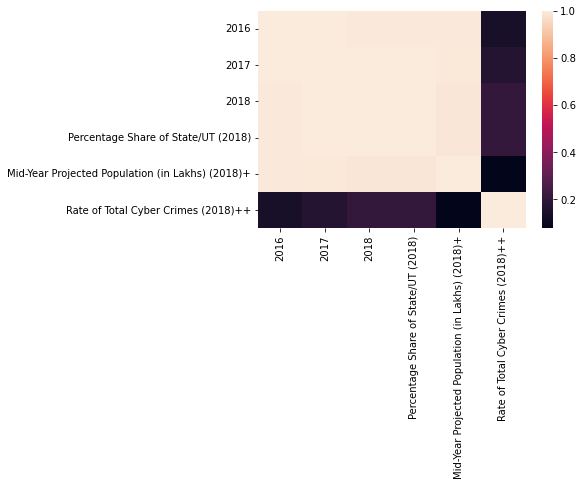

In [4]:
sns.heatmap(df.corr())

In [5]:
df.isnull().sum()

S. No                                               0
Category                                            0
State/UT                                            0
2016                                                0
2017                                                0
2018                                                0
Percentage Share of State/UT (2018)                 0
Mid-Year Projected Population (in Lakhs) (2018)+    0
Rate of Total Cyber Crimes (2018)++                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S. No                                             39 non-null     object 
 1   Category                                          39 non-null     object 
 2   State/UT                                          39 non-null     object 
 3   2016                                              39 non-null     int64  
 4   2017                                              39 non-null     int64  
 5   2018                                              39 non-null     int64  
 6   Percentage Share of State/UT (2018)               39 non-null     float64
 7   Mid-Year Projected Population (in Lakhs) (2018)+  39 non-null     float64
 8   Rate of Total Cyber Crimes (2018)++               39 non-null     float64
dtypes: float64(3), int64(3),

In [7]:
df.shape

(39, 9)

In [8]:
df['Total']=df['2016']+df['2017']+df['2018']
df['Total'].head()

0    2754
1      12
2    3838
3    1116
4     400
Name: Total, dtype: int64

In [9]:
df_new=df[['2016','2017','2018']]
df_new.head()

,2016,2017,2018
0,616,931,1207
1,4,1,7
2,696,1120,2022
3,309,433,374
4,90,171,139


In [10]:
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++,Total
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3,2754
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5,12
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9,3838
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3,1116
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5,400


In [11]:
x=df.drop(['S. No','Category','State/UT','Percentage Share of State/UT (2018)','Mid-Year Projected Population (in Lakhs) (2018)+','Rate of Total Cyber Crimes (2018)++','Total'],axis=1)
y=df['Total']

In [12]:
x.head()

,2016,2017,2018
0,616,931,1207
1,4,1,7
2,696,1120,2022
3,309,433,374
4,90,171,139


In [13]:
x.shape

(39, 3)

In [14]:
y.shape

(39,)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [54]:
print("Train Accuracy :", rf_regressor.score(x_train, y_train))
print("Test Accuracy :", rf_regressor.score(x_test, y_test))

Train Accuracy : 0.9314915329610528
Test Accuracy : 0.9128476090544484
